Lesson - Statistics and Probability V: Comparing Frequency Distribution

In this lesson, we'll learn about the graphs we can use to compare multiple frequency distributions at once using the WNBA data set. 

In [1]:
import pandas as pd
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import and print first few rows of the dataframe
wnba = pd.read_csv("wnba.csv")
print(wnba[:5])

              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College Experience  Games Played  MIN  FGM  \
0   January 17, 1994   23  Michigan State          2             8  173   30   
1       May 14, 1982   35            Duke         12            30  947   90   
2   October 27, 1990   26      Penn State          4            26  617   82   
3  December 11, 1988   28    Georgia Tech          6            31  721   75   
4     August 5, 1994   23          Baylor          R            24  137   16   

   FGA   FG%  15:00  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  STL  \
0   85  35.3   

In [3]:
# We will add the column Exp_ordinal to the dataframe
def make_exp_ordinal(row):
    """ A function to create additional column in dataframe based on players' experience"""
    if row['Experience'] == 0:
        return 'Rookie'
    elif 0 < row['Experience'] <= 3:
        return 'Little Experience'
    elif 3 < row['Experience'] <=  5:
        return 'Experienced'
    elif 5 < row['Experience'] <= 10:
        return 'Very experienced'
    elif row['Experience'] >  10:
        return 'Veteran'
    



# check data type of "Experience" column

print(wnba.Experience.dtype)

# Convert data type of "Experience" column to int: first, replace "R" with 0 to indicated a rookie

wnba["Experience"] = wnba.Experience.str.replace("R", "0")
wnba["Experience"] = wnba.Experience.astype(int)
print(wnba.Experience.dtype)

# Apply the function
wnba["Exp_ordinal"] = wnba.apply(make_exp_ordinal, axis=1)

print(wnba.Exp_ordinal.head(7))

object
int32
0    Little Experience
1              Veteran
2          Experienced
3     Very experienced
4               Rookie
5               Rookie
6               Rookie
Name: Exp_ordinal, dtype: object


Below we will determine how the distribution of `Pos` variable varies with the level of expereince of players. In other words, we want to determine, for instance, what are the positions on the court that rookies play most as, and how do rookies compare to veterans with respect to positions on the field.

Here's a series of steps we can take to achieve that:

- Segment the players in the data set by level of experience.
- For each segment, generate a frequency distribution table for the Pos variable.
- Analyze the frequency distributions comparatively.

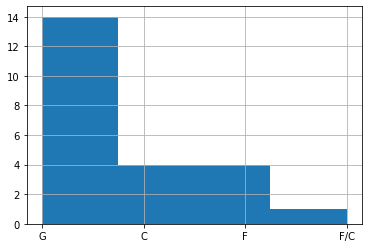

In [44]:
wnba_exp = wnba.groupby("Exp_ordinal")
rookies = wnba_exp.get_group("Rookie") # constructs dataframe from group
rookies['Pos'].hist(bins = 4)

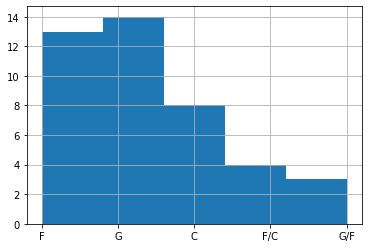

In [24]:
little_experience = wnba_exp.get_group("Little Experience")
little_experience['Pos'].hist(bins = 5)

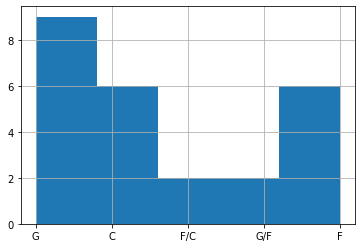

In [27]:
experienced = wnba_exp.get_group("Experienced")
experienced['Pos'].hist(bins = 5)

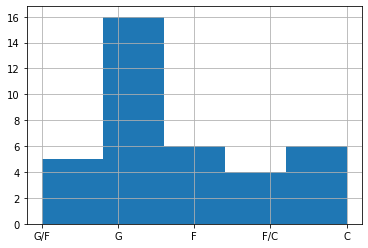

In [36]:
very_experienced = wnba_exp.get_group("Very experienced")
very_experienced.Pos.hist(bins = 5)

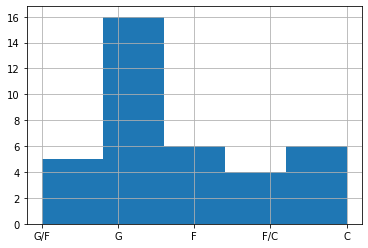

In [33]:
veteran = wnba_exp.get_group("Very experienced")
veteran['Pos'].hist(bins = 5)

Note: We can use following to create separate dataframes for each group as well, for ease of data manipulation 
 

```
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

```

We can also plot the histograms together for comparison purposes. 

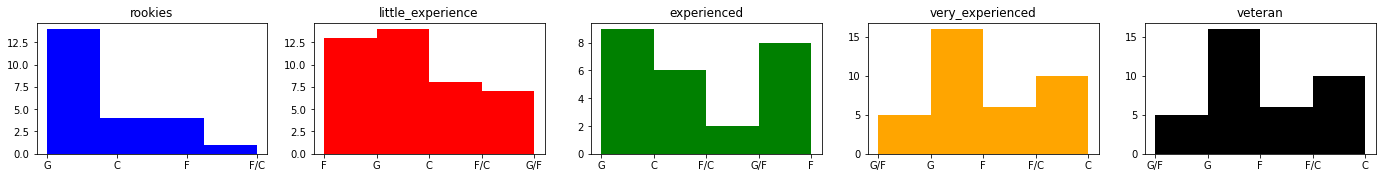

In [85]:
groups = [rookies,little_experience, experienced, very_experienced, veteran]
titles = ['rookies','little_experience', 'experienced', 'very_experienced', 'veteran']
colors = ['blue', 'red', 'green', 'orange', 'black']
fig = plt.figure(figsize=(24, 14))
for i in range(0,5):
    ax = fig.add_subplot(len(groups),5,i+1)
    ax.hist(groups[i]["Pos"], bins = 4, color = colors[i])
    ax.set_title(titles[i])

## Grouped Bar Plots
Above example shows that it is quite cumbersome to compare multiple distributions at once using frequency tables, but we can make the comparison much quicker and more efficiently using graphs.

All the five frequency tables we wanted to compare were for the `Pos` variable, which is measured on a nominal scale. Remember that one kind of graph we can use to visualize the distribution of a nominal variable is a bar plot. A simple solution to our problem is to generate a bar plot for each table, and then group all the bar plots on a single figure.

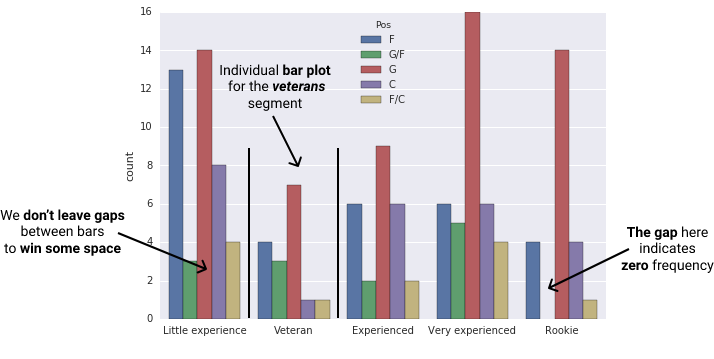

The graph above is called a **grouped bar plot**. We can generate a grouped bar plot using the `seaborn.countplot()` [function](https://seaborn.pydata.org/generated/seaborn.countplot.html) which shows the counts of observations in each categorical bin using bars, from the seaborn module. "A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable."

Below, we will write a code snippet:

- Import the seaborn module with the alias sns.
- Generate the plot with sns.countplot(). We'll use the following parameters for this function:
- x — specifies as a string the name of the column we want on the x-axis. We'll place the `Exp_ordinal column` on the x-axis.
- hue — specifies as a string the name of the column we want the bar plots generated for. We want to generate the bar plots for the `Pos` column.
- data - specifies the name of the variable which stores the data set. We stored the data in a variable named `wnba`.

The method will group according to the value on X-axis i.e. `Exp_ordinal` collumn, count observations for hue parameter i.e `Pos` column.


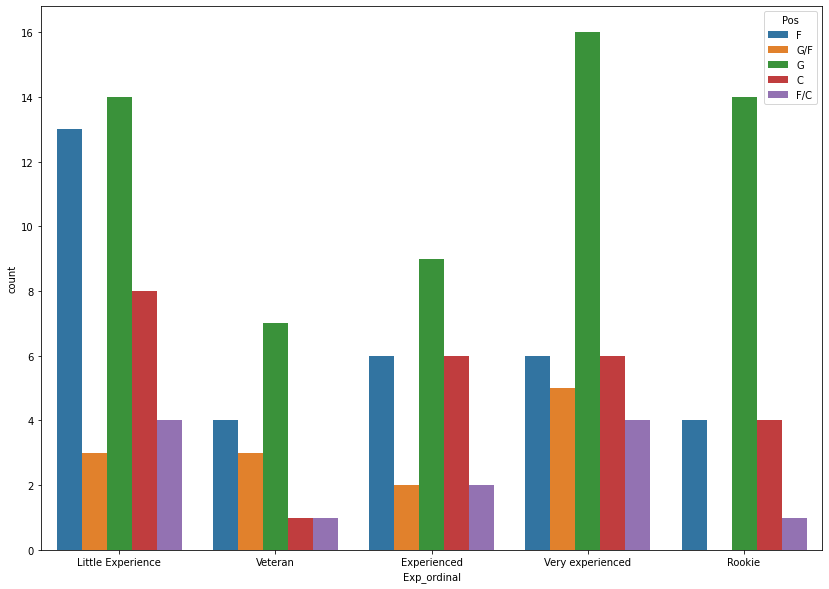

In [72]:
import seaborn as sns
fig = plt.figure(figsize=(14, 10))
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba)

From above plot, we can infer that:
There's only one rookie playing on a combined position (F/C). This is significantly less compared to more experienced players, which suggests that combined positions (F/C and G/F) may require more complex skills on the field that rookies rarely have.
Rookies are the only category where we don't find players on all positions. We can see there are no rookies who play on a G/F position.
Guards predominate for every level of experience. This probably means that most players in a basketball team are guards.

We can also use other parameters of the sns.countplot() function to get further insights.

Below, we will generate a grouped bar plot similar to the one above.

- Place the `Exp_ordinal` variable on the x-axis.
- Generate the bar plots for the `Pos` variable. The data set is stored in wnba variable.
- Using the `order` parameter of sns.countplot(), order the values on the x-axis in ascending order. The order parameter takes in a list of strings, so we will use order = $['Rookie', 'Little experience', ..........].$
- Using the `hue_order` parameter, order the bars of each bar plot in ascending alphabetic order. hue_order takes in a list of strings, so we will use hue_order = $['C', 'F', ......].$

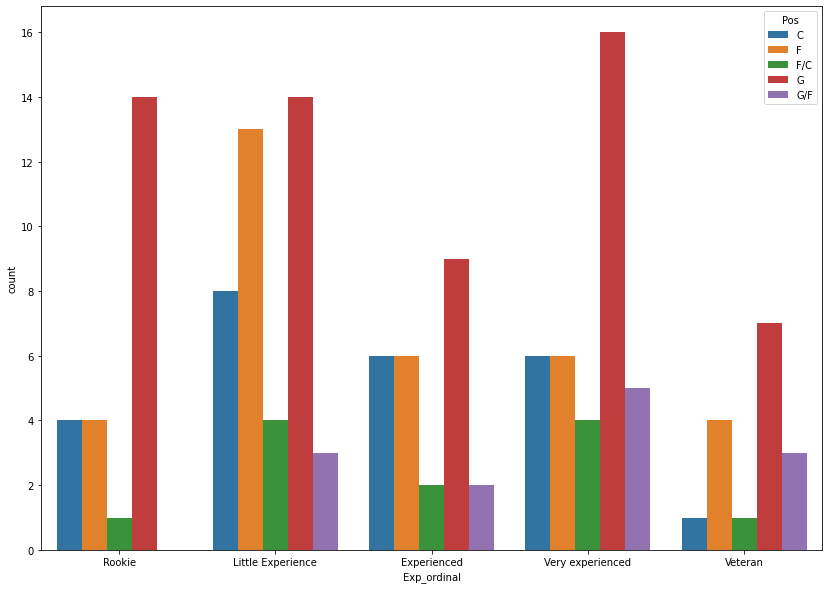

In [76]:
order = ['Rookie', 'Little Experience', 'Experienced', 'Very experienced', 'Veteran']
hue_order = ['C', 'F', 'F/C', 'G', 'G/F']

fig = plt.figure(figsize=(14, 10))
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba, order = order, hue_order = hue_order)

**Exercise** - Do Older Players Play Less?

When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. On average, a WNBA player played approximately 497 minutes in the 2016-2017 season:

In [77]:
wnba.MIN.mean()

496.97202797202794

Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27:

In [78]:
wnba.Age.mean()

27.076923076923077

To test our hypothesis, we can generate a grouped bar plot to examine the frequency distribution of younger and older players that played under the average or as much as the average or above. Our hypothesis predicts that we should see a grouped bar plot that looks similar to this:

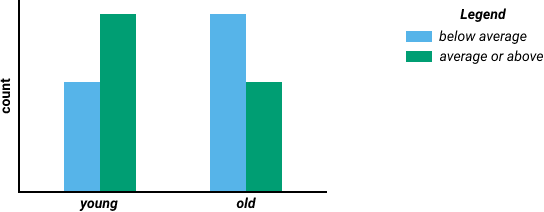

To generate a graph like the one above, we'll first need to create two new variables:

An ordinal variable which labels each player as "young" or "old". If the player is 27 or over, we'll label her "old", otherwise the label is "young".
An ordinal variable which describes whether the minutes played is below or above average (or equal to the average). If a player played 497 minutes or more, we'll assign her the label "average or above", otherwise we'll assign "below average".

In the code below, we'll use `lambda` functions to describe quickly the labeling logic above and `Series.apply()` to apply the `lambda` functions on the `Age` and `MIN` columns. We'll name the two resulting columns age_mean_relative and min_mean_relative

In [81]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')

print(wnba[['Name', 'Age', 'age_mean_relative', 'MIN', 'min_mean_relative']].head())

              Name  Age age_mean_relative  MIN min_mean_relative
0    Aerial Powers   23             young  173     below average
1      Alana Beard   35               old  947  average or above
2     Alex Bentley   26             young  617  average or above
3  Alex Montgomery   28               old  721  average or above
4     Alexis Jones   23             young  137     below average


We will now, generate a grouped bar plot to confirm or reject our hypothesis. Using sns.countplot():

- Place the age_mean_relative variable on the x-axis. The age_mean_relative and min_mean_relative are already defined.
- Generate the frequency distributions for the min_mean_relative variable.
- Analyze the graph and determine whether the data confirms or rejects our hypothesis.

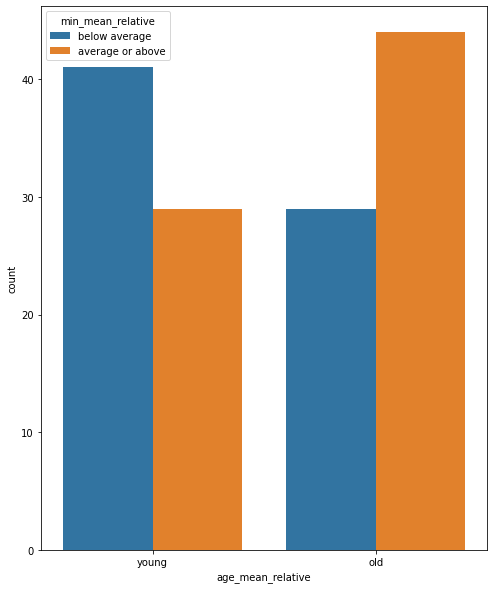

In [83]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

So, our hypothesis is not confirmed. The older players play on the average more minutes as compared to younger players. 

## Comparing Histograms

A shortcoming of our analysis so far is that the `min_mean_relative` variable is a binary caqtegory and doesn't show much granularity. We can see that more old players belong to the "average or above" category than to "below average", but we can't tell, for instance, whether old players generally play much more than the average.

The `MIN` variable, on the other hand, from which `min_mean_relative` variable was derived, is much more granular. We can compare the distribution of `MIN` variable throughout its range for 'Young' and 'Old' players, by plotting histograms instead of bar plots.

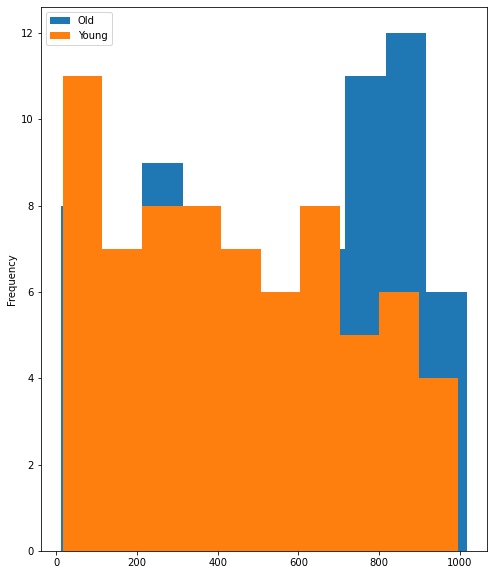

In [87]:
fig = plt.figure(figsize=(8, 10))
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

We can see above that most of the old players that belong to the "average or above" category play significantly more than average. The main downside of the visualization above is that the histogram for young players covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the histtype parameter and choose the `step` or alternate with `step` and `stepfilled` type:

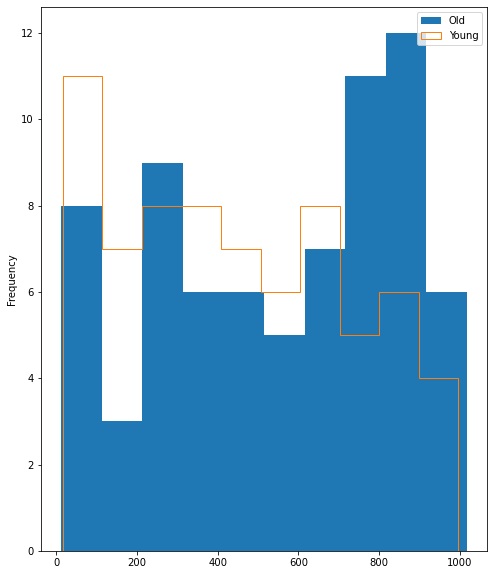

In [89]:
fig = plt.figure(figsize=(8, 10))
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'stepfilled', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

We can also draw a vertical line using `plt.axvline()` [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) to indicate the mean value of `MIN`.

Below, we will add a vertical line to demarcate the average point:

- The vertical line will be at point 497 on the x-axis.
- We will use the `label` parameter of `plt.axvline()` to label it 'Average'. Display the label by running `plt.legend()`.
- Specify `plt.show()` to display the plot.
- We will use `linewidth` and `color` pqrameters of `plt.axvline()` function to make the line more prominent

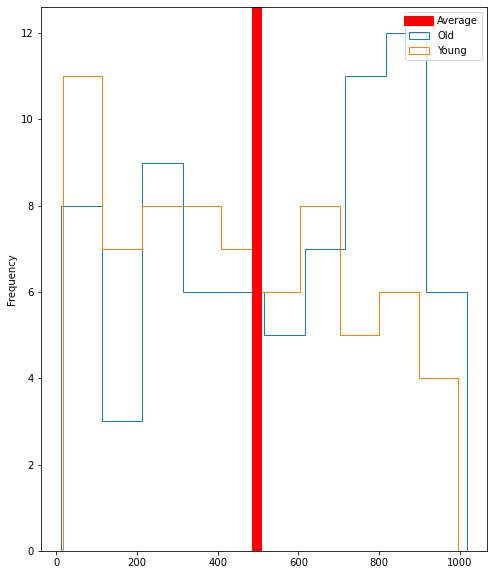

In [94]:
fig = plt.figure(figsize=(8, 10))
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

plt.axvline(x = wnba.MIN.mean(), ymin = 0, ymax = 1, label = 'Average', linewidth = 10, color = 'red')
plt.legend()
plt.show()

## Kernel Density Estimate Plots

The step-type histograms we built made it possible to see clearly both distributions. But, the graph looked a bit overcrowded, and the legend was not ideally positioned. If we added more histograms to the graph above, it would become highly unreadable, and it'd be difficult to see any clear patterns. One solution to this problem is to smooth out the shape of the histograms to make them look less dense on the graph. This is how a single histogram would look smoothed out:

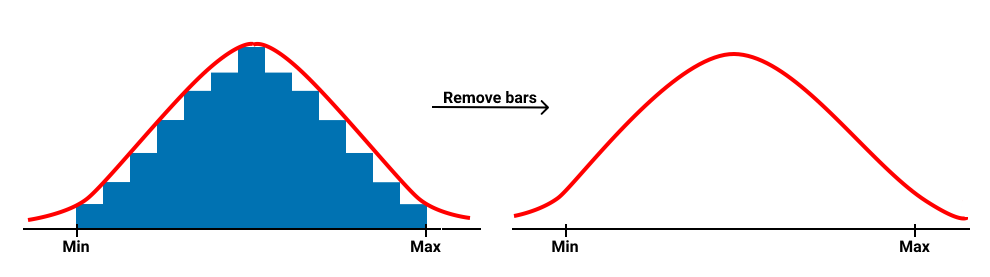

We can smooth out the two histograms above for old and young players using the `Series.plot.kde()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.kde.html) whichgenerates Kernel Density Estimate plot using Gaussian kernels. 
"In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination."

Each of the smoothed histograms below is called a kernel density estimate plot or, shorter, kernel density plot. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values.

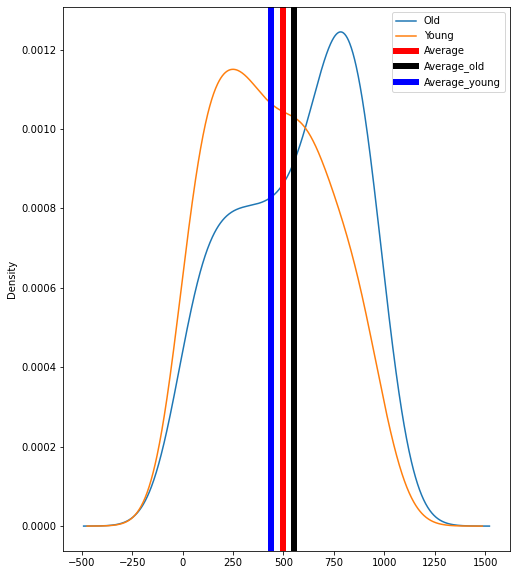

In [101]:
fig = plt.figure(figsize=(8, 10))
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

# Add vertical line for average no of minutes played
plt.axvline(x = wnba.MIN.mean(), ymin = 0, ymax = 1, label = 'Average', linewidth = 6, color = 'red')
# Add vertical lines for respectivre means as well
plt.axvline(x = wnba[wnba.Age >= 27]['MIN'].mean(), ymin = 0, ymax = 1, label = 'Average_old', linewidth = 6, color = 'black')
plt.axvline(x = wnba[wnba.Age < 27]['MIN'].mean(), ymin = 0, ymax = 1, label = 'Average_young', linewidth = 6, color = 'blue')
plt.legend()
plt.show()

''' In the above graph, we can still observe that most of the old players that belong to the "average or above"
category play significantly more than average. With the help of the vertical line, the pattern
is very easy to notice. Because the graph looks much cleaner than the one with step-type
histograms, we can easily argue that the pattern is much more obvious in the case of kernel density
plots.'''

### Drawbacks of KDE Plots

Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots tend to become unreadable as we reach five distributions or more.

Below, we analyze the distribution of player height as a function of player position. In other words, we want to figure out, for instance, whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on. In the code below, we'll segment the data set by player position, and for each segment we'll generate a kernel density plot for the distribution of the `Height` variable:

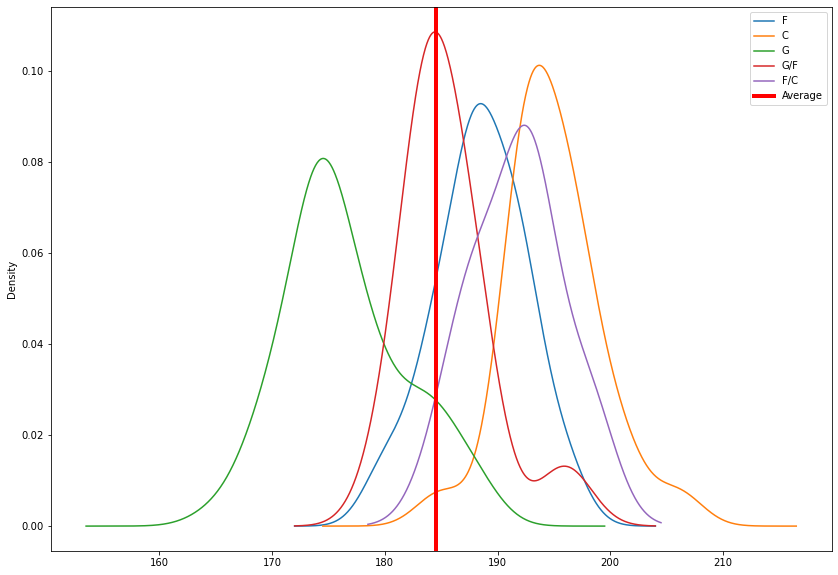

In [107]:
fig = plt.figure(figsize=(14, 10))
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

# Add a vertical line for mean height as well
plt.axvline(x = wnba.Height.mean(), ymin = 0, ymax = 1, label = 'Average', linewidth = 4, color = 'red')
plt.legend()
plt.show()

If we look very closely, we can see a couple of clear patterns: the shortest players (left of average line) are generally guards, the tallest players (right of average line) are generally centers, mid-height players are generally forwards (close to mean) or play in a combined position (G/F is symmetrical across the average), etc.

 ### Strip Plots
 
Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way.
Strip plots can be used to visualize the distribution of heights as a function of player position. 

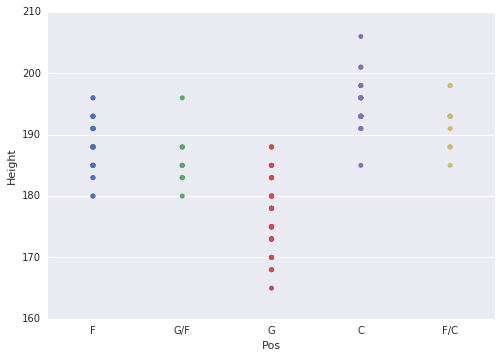

The Pos variable is represented on the x-axis, while Height is on the y-axis. Each of the five vertical lines made of distinctly colored bullets represents a distribution. These are the logical steps we'd take to build a plot like the one above:


Segment the data set by player position.
For every segment:
- List all the values in the Height variable.
- For every value in that list, draw a bullet point on a graph. The x-coordinate of the bullet point is given by the player position, and the y-coordinate by the player's height.
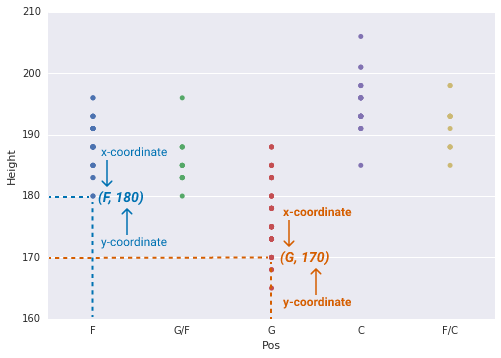

Because we segment by player position, for every segment the player position values will be identical for every player while their heights will vary more or less. Because of the segmentation, the player position is also guaranteed to be different from segment to segment. After drawing all the bullet points for all the segments, we'll inevitably end up with five narrow vertical strips, one above each unique value on the x-axis. Because of this, each of the five plots is called a strip plot.

 To generate the first graph above with five strip plots, we can use the `sns.stripplot()` [function](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) from the seaborn module, which draws a scatterplot where one variable is categorical.. We place the `Pos` variable on the x-axis and `Height` on the y-axis:

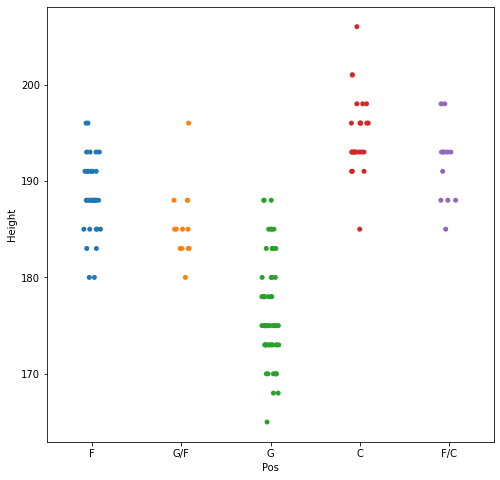

In [110]:
fig = plt.figure(figsize=(8, 8))
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

Patterns are now immediately visible. We can see on the graph that the shortest players are guards — in fact, all players under 180 cm are guards. The tallest players are centers — this is the only category with players above 2 meters. Among combined positions, we can see that F/C has slightly taller representatives — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

A big downside of strip plots is that the bullet points overlap. We can fix this by adding a bit of `jitter` to each distribution. We can do this by setting the `jitter` parameter to True:

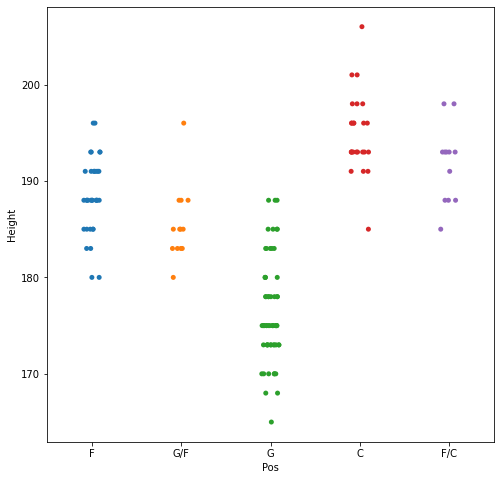

In [111]:
fig = plt.figure(figsize=(8, 8))
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter = True)

In fact, strip plots are actually scatter plots. When one of the variables is nominal or ordinal, a scatter plot will generally take the form of a series of narrow strips (the number of narrow strips will be the same as the number of unique values in the nominal or ordinal variable).

Below, ussing strip plots, we will examine the distribution of player weight (not height) as a function of player position. The graph will have the following properties:

- The `Pos` variable is on the x-axis and the `Weight` variable on the y-axis.
- Each strip plot has `jitter` added to it. The amount of `jitter` to apply is the one specific to jitter = True.
- Specify `plt.show()` to display the plot.


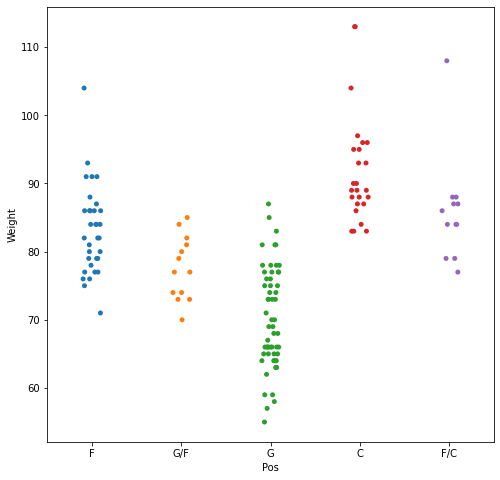

In [112]:
fig = plt.figure(figsize=(8, 8))
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)
plt.show()

'''The patterns we see above are strikingly similar to those we saw for heights. This can be easily
explained by the fact that there's a strong positive relation between a player's height and her
weight: the taller the player, the heavier she is; the shorter the player, the lighter she is.'''

## Box Plots
Besides strip plots, we can use box plots to display many distributions at once and make sure everything is still readable.
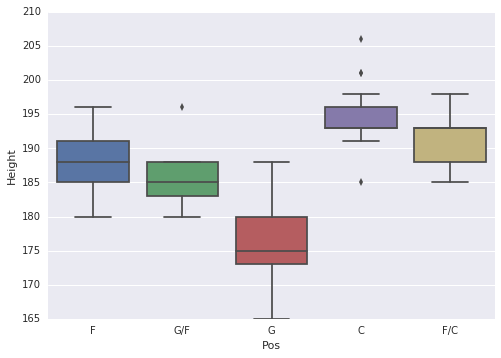

Each individual plot above shows a distribution. Let's isolate the height distribution of guards and understand it by comparing it with a histogram showing the same distribution. 
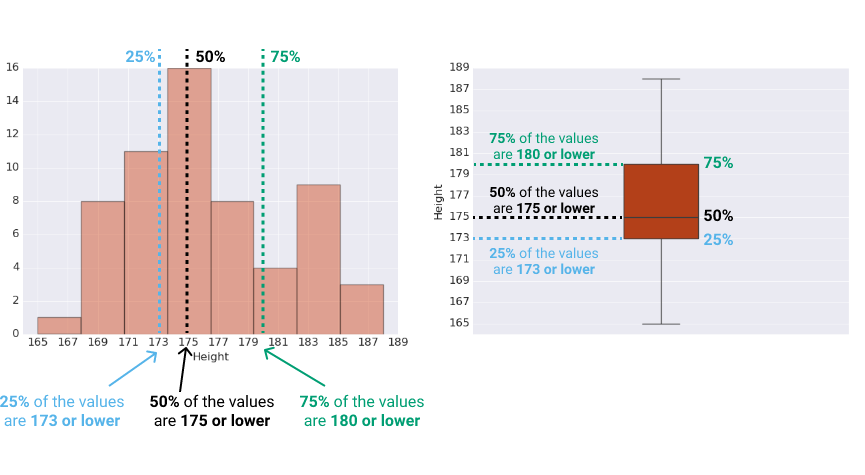
the graph on the right shows the range of the distribution and its three quartiles (the 25th, the 50th and the 75th percentile). This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution.

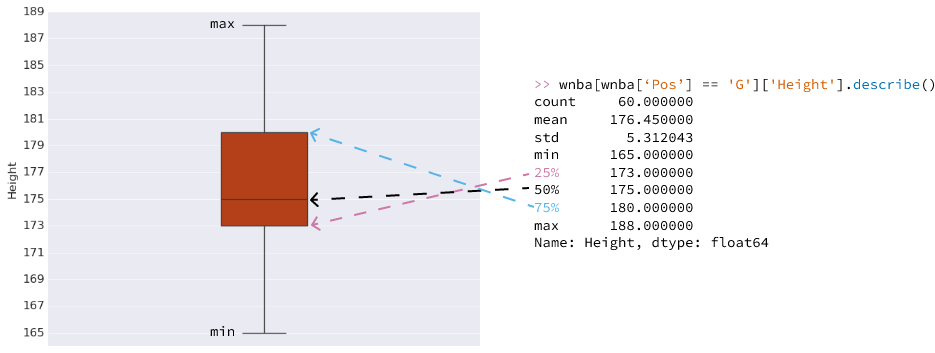

The two lines extending upwards and downwards out of the box in the middle look a bit like two whiskers, reason for which we call this plot a **box-and-whisker** plot, or, more convenient, just **box plot**. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers”.

We can generate the five box plots above using the `sns.boxplot()` [function](https://seaborn.pydata.org/generated/seaborn.boxplot.html), which draws a box plot to show distributions with respect to categories. On the x-axis we want the `Pos` variable, and on the y-axis the `Height` variable.

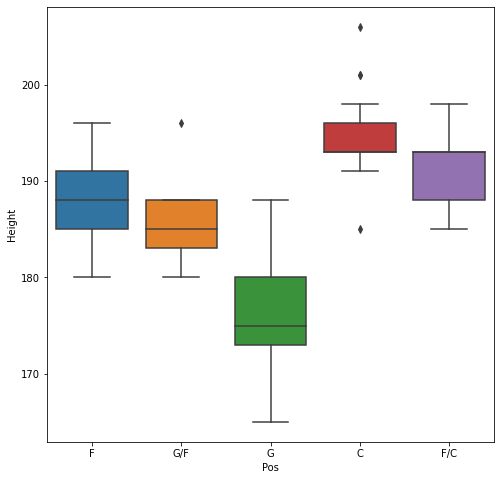

In [114]:
fig = plt.figure(figsize=(8, 8))
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)
plt.show()

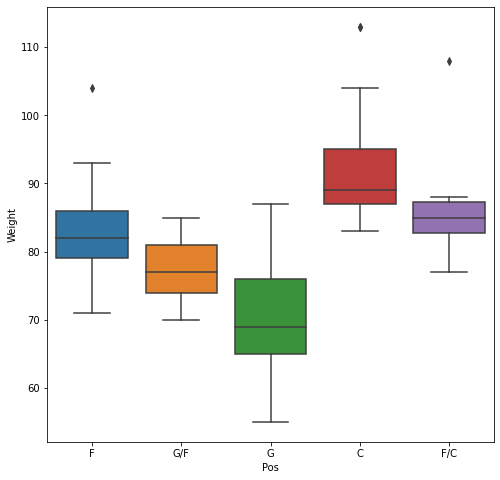

In [115]:
# Box Plots for players' weights

fig = plt.figure(figsize=(8, 8))
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)
plt.show()

### Outliers

The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an outlier.

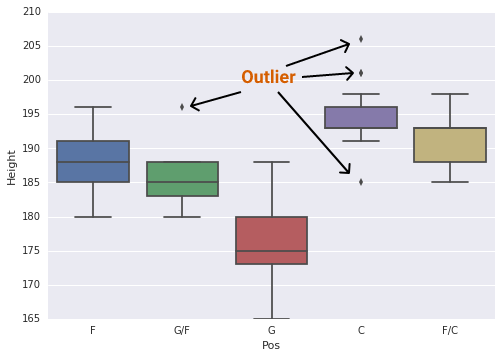

 A value is an outlier if:

- It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
- It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

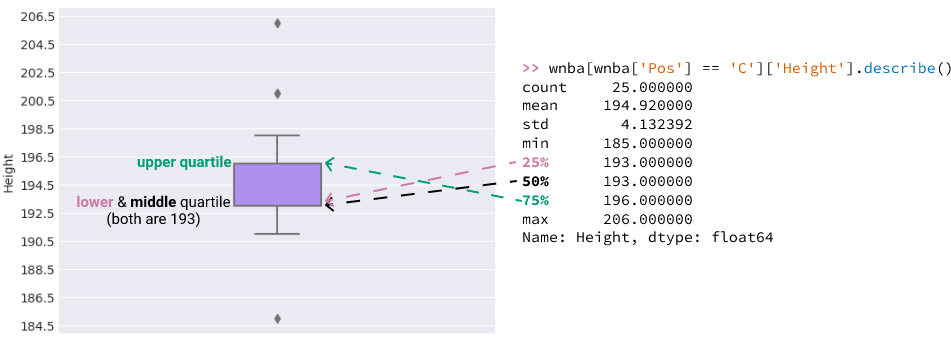

From the output of wnba[wnba['Pos'] == 'C']['Height'].describe(), we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3.
$$begin{equation} interquartile\ range = upper\ quartile - lower\ quartile = 196 - 193 = 3 \end{equation}$$


In [116]:
wnba[wnba['Pos'] == 'C']['Height'].describe()

count     25.000000
mean     194.920000
std        4.132392
min      185.000000
25%      193.000000
50%      193.000000
75%      196.000000
max      206.000000
Name: Height, dtype: float64

Every value that is 3x1.5 i.e. 4.5 more than upper quartile is an outlier and every value which is 4.5 less than lower quartile is also an outlier. Hence, 196 + 4.5 = 200.5 is the upper bound above which there will be outliers and similarly 193 - 4.5 = 188.5 is the lower bound below which there will be outliers.

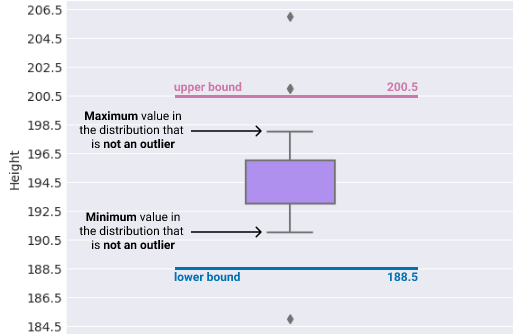

This formal definition of an outlier is arbitrary, and it could be changed if we wanted to. For any given distribution, the upper and lower quartiles, and the interquartile range remain constant. However, the 1.5 factor can vary. If the factor is increased, then the range outside which values are considered outliers increases as well. If the factor is decreased, the range outside which values are considered outlier decreases as well.

When we generate boxplots, we can increase or decrease this factor by using the `whis` parameter of the `sns.boxplot()` function.

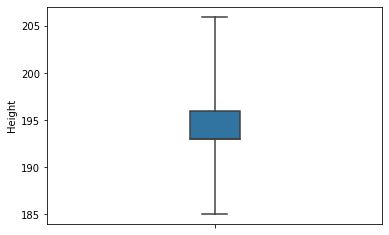

In [117]:
# We change whisker to 4 instead of default 1.5 to remove all outliers
sns.boxplot(wnba[wnba['Pos'] == 'C']['Height'], whis = 4,
           orient = 'vertical', width = .15)

Below, we consider the quartiles of `Games Played` vairable using `describe()` function, determine outliers and plot box plot tp confirm our analysis.

The IQR = 29 - 22 = 7
Upper Bound = 29 + (7 x 1.5) = 39.5
Lower Bound = 22 - (7 x 1.5) = 11.5 ~ 11

Since the max is 32, so there are no upper outliers.
For the lower outliers we will have to determine the numbers using `value_counts()` method

In [118]:
wnba['Games Played']. describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

In [121]:
wnba['Games Played']. value_counts(bins = 10).sort_index()

(1.969, 5.0]     5
(5.0, 8.0]       4
(8.0, 11.0]      3
(11.0, 14.0]     5
(14.0, 17.0]     6
(17.0, 20.0]     8
(20.0, 23.0]    15
(23.0, 26.0]    18
(26.0, 29.0]    48
(29.0, 32.0]    31
Name: Games Played, dtype: int64

It can be seen, there are 12 'lower outliers' but no 'upper outlier'.
We can confirm by plotting a box plot

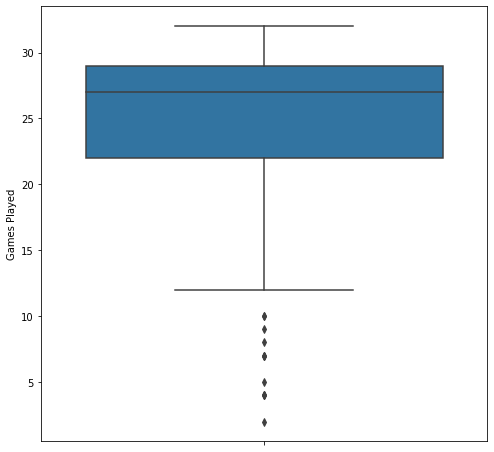

In [127]:
fig = plt.figure(figsize=(8, 8))
sns.boxplot(wnba['Games Played'], orient = "vertical", whis = 1.5)
plt.show()

### Summary

For variables measured on an interval or ratio scale, we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.
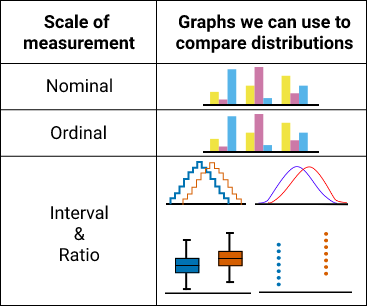

### Workflow
The workflow for statistical analysis, has now been completed

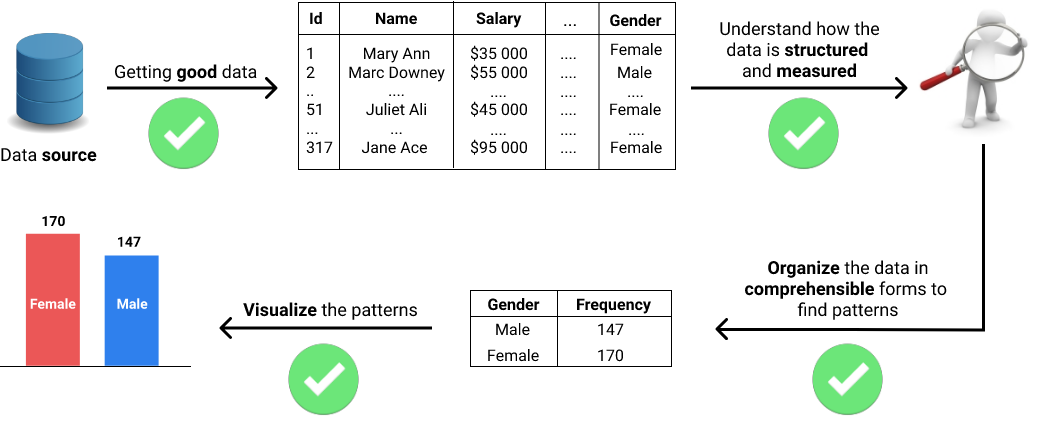